In [1]:
#Importing Neccessay Libraries
import pandas as pd 
import numpy as np

#The Models to be used
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaluators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

#For Visualization Purposes
import matplotlib.pyplot as plt
import seaborn as sns

#For Configuration of plots
%matplotlib inline

#To set a random seed
seed = 42

In [2]:
import pandas as pd

filepath = 'finfraud.csv'

#Dataset Import into the dataframe 
df = pd.read_csv(filepath, index_col=0)

#To view the dataframe's first five rows 
df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0


In [5]:
#To view bottom rows
df.tail()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0
10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0
10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0
10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0
10126,7,PAYMENT,Cuba,8126.71,C1639296014,6423.0,0.00,M129774606,0.0,0.0,11,0,Current,2/1/2018,Afternoon,0


In [6]:
#Understading the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud
count,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.0,10127.000000
mean,4.214279,1.048923e+05,8.835245e+05,9.044703e+05,9.334607e+05,1.109099e+06,10.513183,0.0,0.006715
std,2.484139,2.706165e+05,2.124379e+06,2.169946e+06,2.677856e+06,3.048382e+06,5.809233,0.0,0.081672
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
25%,1.000000,4.395055e+03,1.295000e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.0,0.000000
50%,5.000000,1.279831e+04,2.135400e+04,1.021224e+04,0.000000e+00,0.000000e+00,10.000000,0.0,0.000000
75%,7.000000,1.143832e+05,1.724277e+05,1.707240e+05,2.819087e+05,2.523799e+05,16.000000,0.0,0.000000
max,7.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,2.260000e+07,20.000000,0.0,1.000000


In [7]:
#To see the shape of the dataset-rows and columns
df.shape

(10127, 16)

In [8]:
#dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10127 non-null  int64  
 1   type                 10127 non-null  object 
 2   branch               10127 non-null  object 
 3   amount               10127 non-null  float64
 4   nameOrig             10127 non-null  object 
 5   oldbalanceOrg        10127 non-null  float64
 6   newbalanceOrig       10127 non-null  float64
 7   nameDest             10127 non-null  object 
 8   oldbalanceDest       10127 non-null  float64
 9   newbalanceDest       10127 non-null  float64
 10  unusuallogin         10127 non-null  int64  
 11  isFlaggedFraud       10127 non-null  int64  
 12  Acct type            10127 non-null  object 
 13  Date of transaction  10127 non-null  object 
 14  Time of day          10127 non-null  object 
 15  isFraud              10127 non-null 

In [9]:
#Features Check
pd.DataFrame(df.columns, columns=['Features'])

,Features
0,step
1,type
2,branch
3,amount
4,nameOrig
5,oldbalanceOrg
6,newbalanceOrig
7,nameDest
8,oldbalanceDest
9,newbalanceDest


In [10]:
#Check data types of columns
df.dtypes

step                     int64
type                    object
branch                  object
amount                 float64
nameOrig                object
oldbalanceOrg          float64
newbalanceOrig         float64
nameDest                object
oldbalanceDest         float64
newbalanceDest         float64
unusuallogin             int64
isFlaggedFraud           int64
Acct type               object
Date of transaction     object
Time of day             object
isFraud                  int64
dtype: object

In [11]:
#Checking for null values
df.isnull().sum() 

step                   0
type                   0
branch                 0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
unusuallogin           0
isFlaggedFraud         0
Acct type              0
Date of transaction    0
Time of day            0
isFraud                0
dtype: int64

In [13]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,Current,3/1/2018,Morning,0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,Savings,5/1/2018,Morning,0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,Current,7/1/2018,Morning,1
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Current,6/1/2018,Afternoon,1
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,Current,6/1/2018,Morning,0


Text(0.5, 0, 'Transaction Amount')

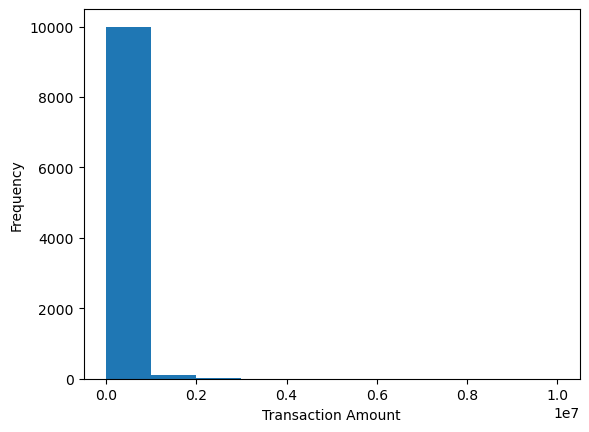

In [14]:
# Look at distribution of continuous columns
df['amount'].plot.hist()
plt.xlabel('Transaction Amount')

In [15]:
#Correlation of Numeric Columns
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFraud
step,1.000000,0.024920,-0.037466,-0.036679,0.031352,0.031489,-0.007395,-0.012934
amount,0.024920,1.000000,0.118284,0.085656,0.354796,0.429040,-0.027060,0.130217
oldbalanceOrg,-0.037466,0.118284,1.000000,0.996736,0.226418,0.192962,0.016500,-0.012208
newbalanceOrig,-0.036679,0.085656,0.996736,1.000000,0.234494,0.197032,0.018012,-0.032639
oldbalanceDest,0.031352,0.354796,0.226418,0.234494,1.000000,0.938940,-0.012026,-0.020839
newbalanceDest,0.031489,0.429040,0.192962,0.197032,0.938940,1.000000,-0.015098,-0.011023
unusuallogin,-0.007395,-0.027060,0.016500,0.018012,-0.012026,-0.015098,1.000000,-0.062839
isFraud,-0.012934,0.130217,-0.012208,-0.032639,-0.020839,-0.011023,-0.062839,1.000000


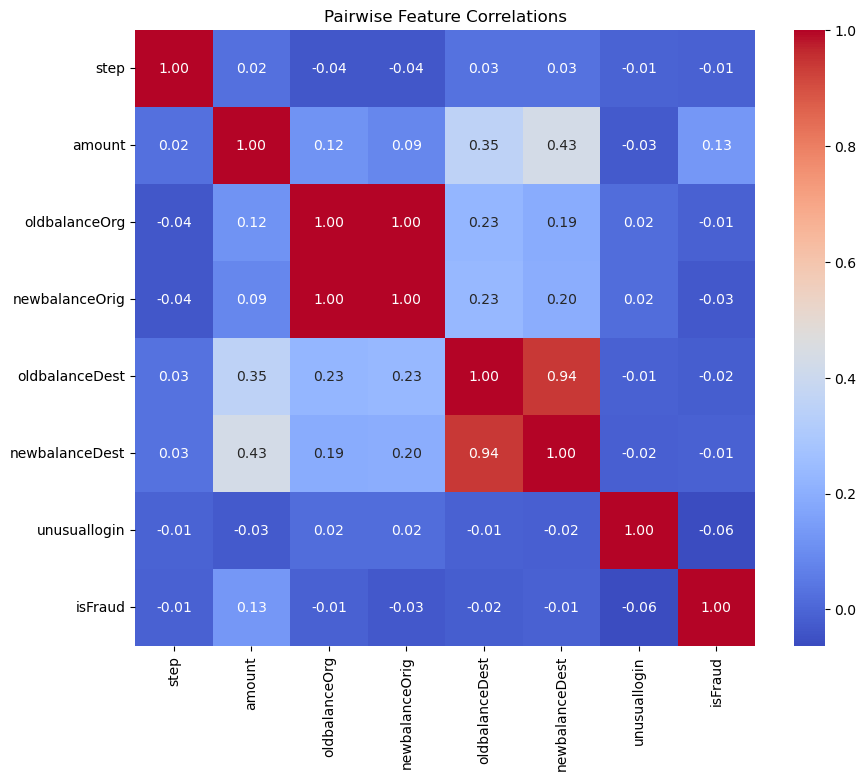

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Feature Correlations")
plt.show()

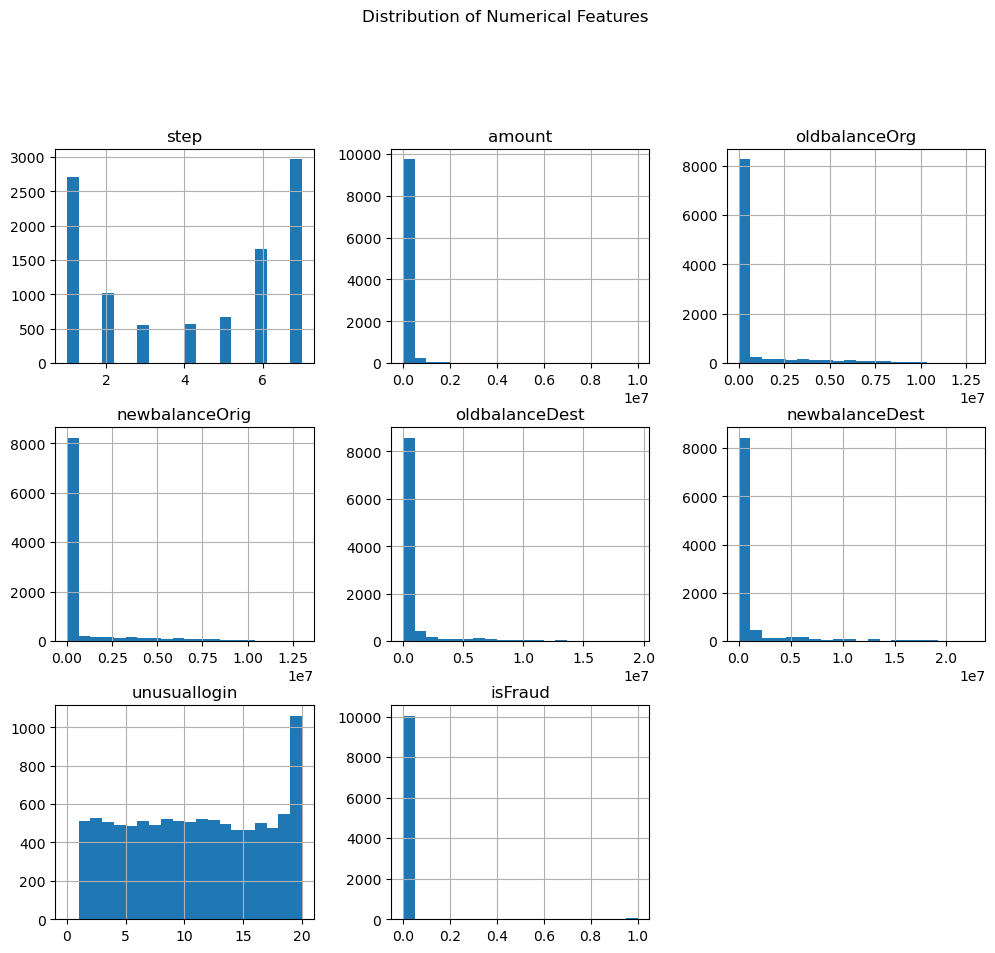

In [17]:
#Distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()

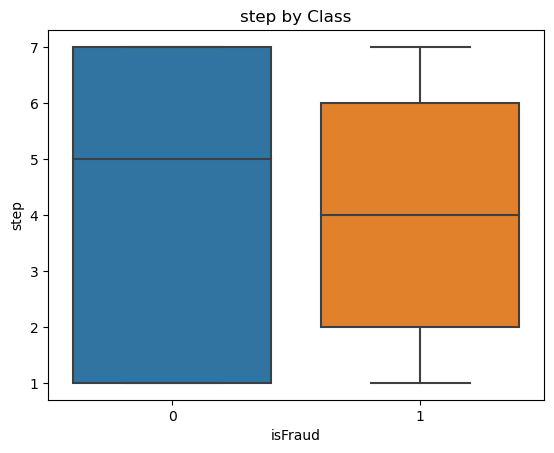

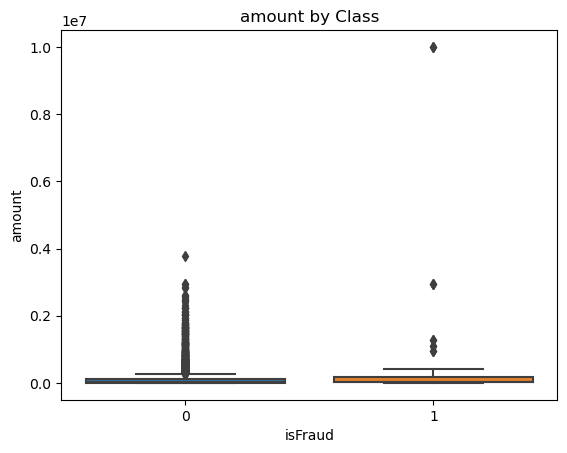

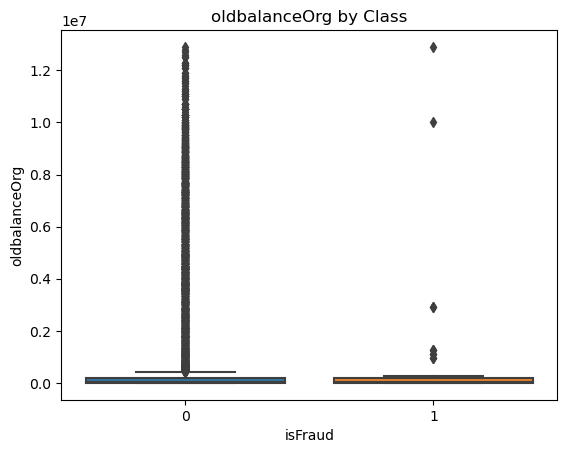

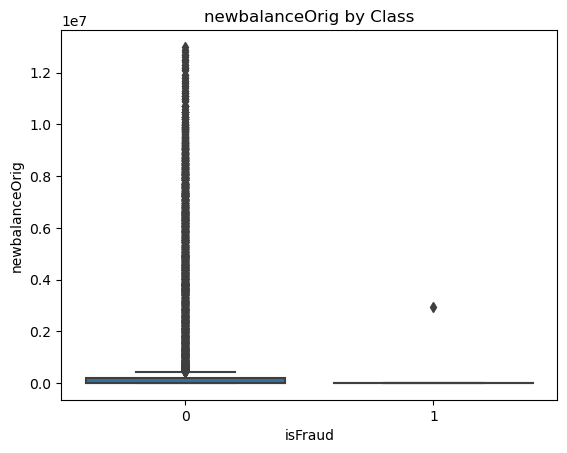

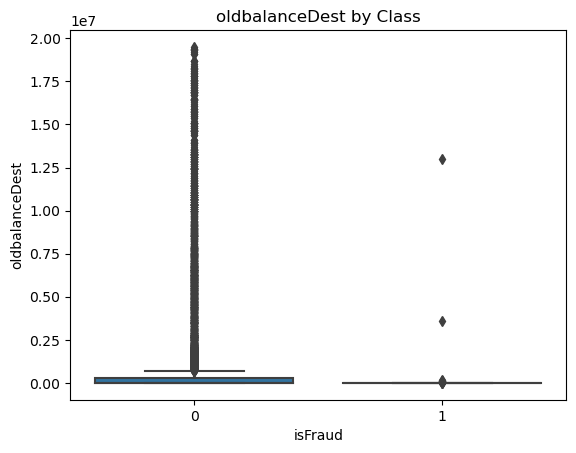

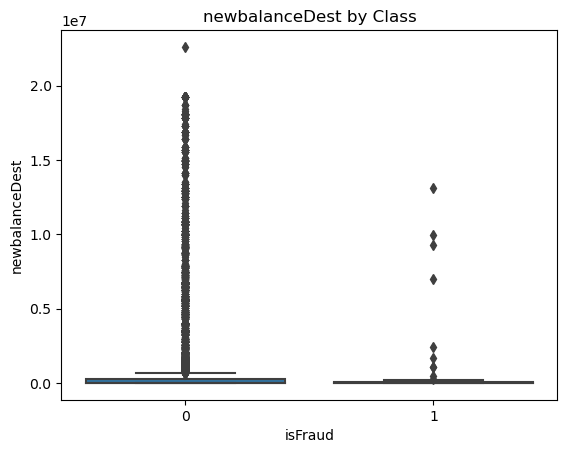

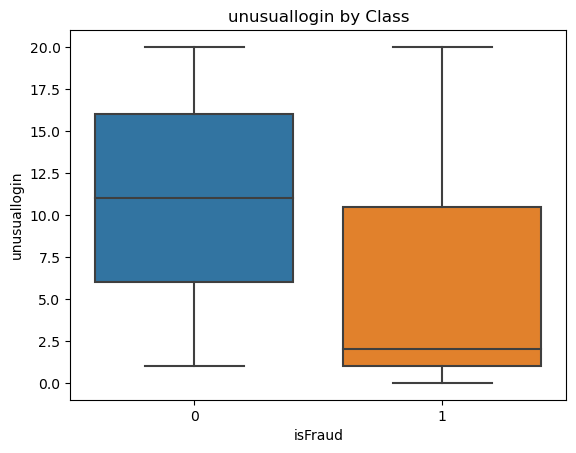

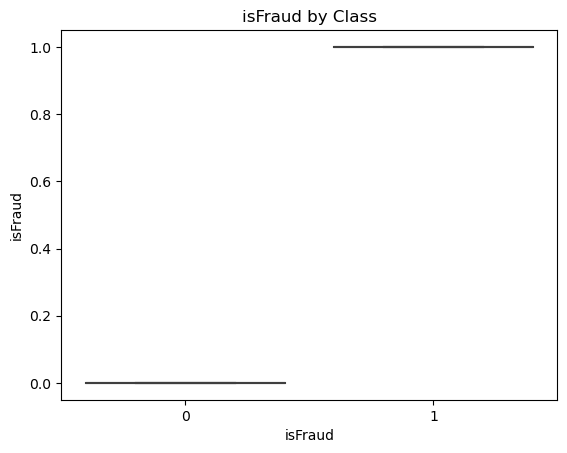

In [18]:
# Box plots for numerical features (optional)
for column in numerical_features.columns:
     sns.boxplot(x=df['isFraud'], y=column, data=df)
     plt.title(f"{column} by Class")
     plt.show()

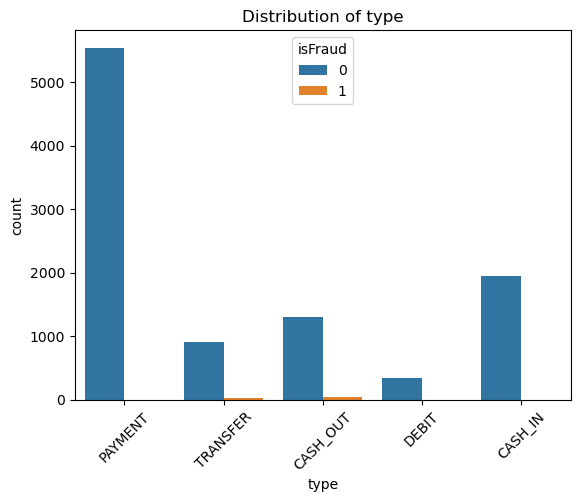

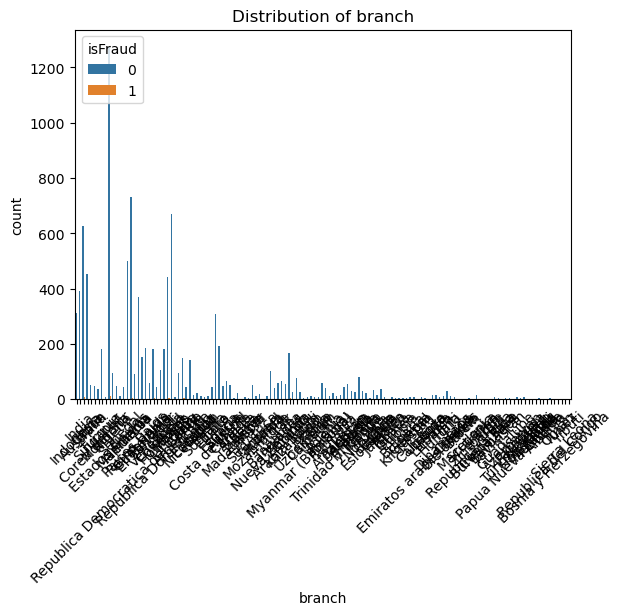

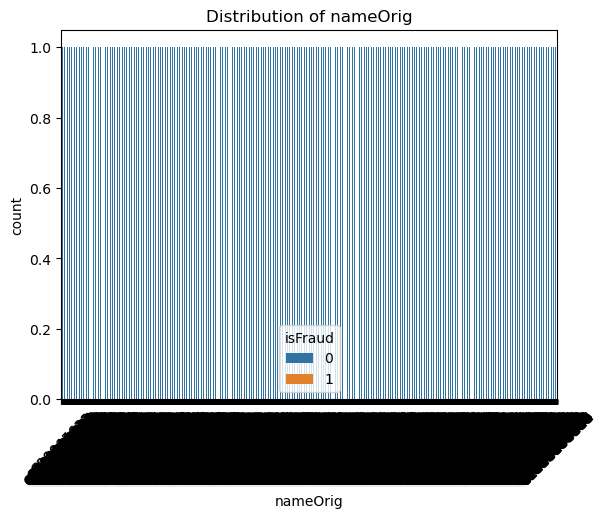

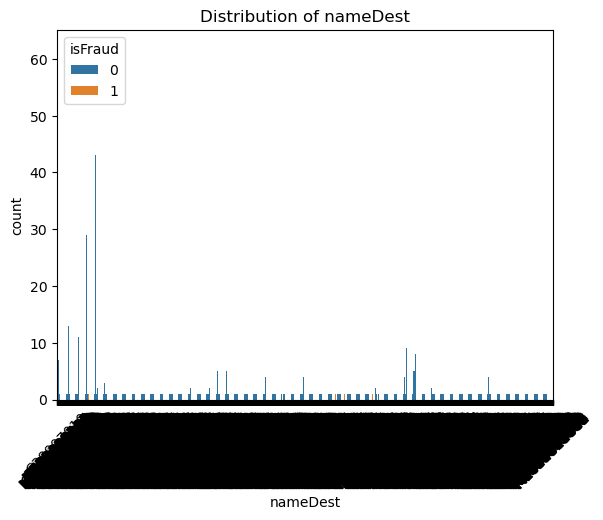

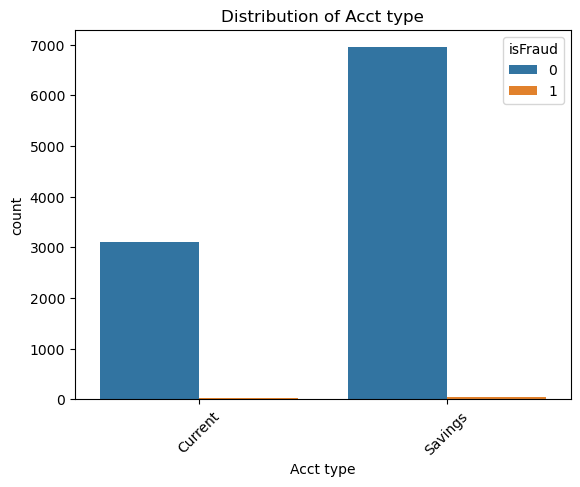

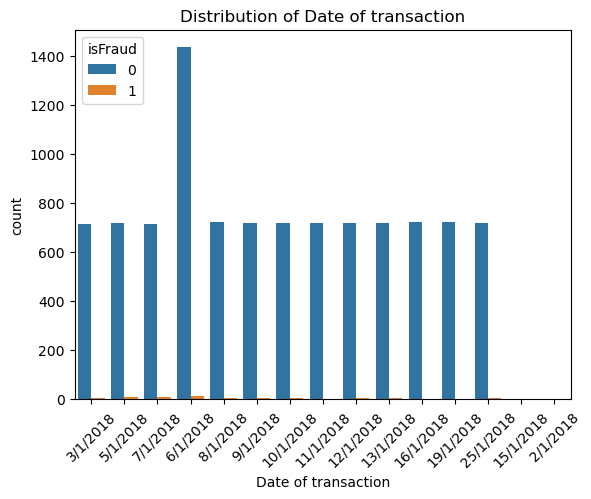

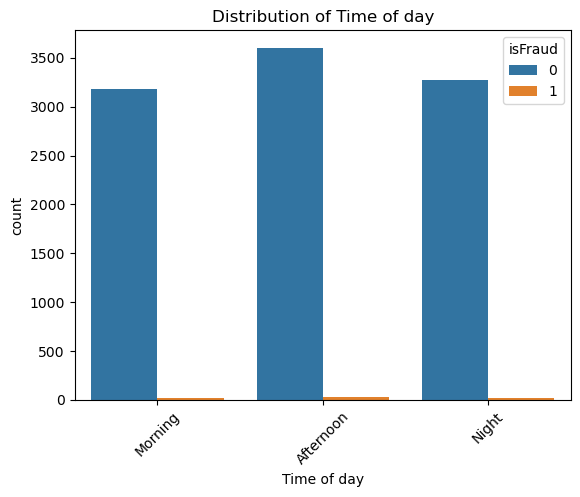

In [19]:
# Distribution of categorical features (optional)
categorical_features = df.select_dtypes(include=['object'])
for column in categorical_features.columns:
    sns.countplot(x=column, data=df, hue='isFraud')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

PAYMENT     5542
CASH_IN     1954
CASH_OUT    1337
TRANSFER     947
DEBIT        347
Name: type, dtype: int64


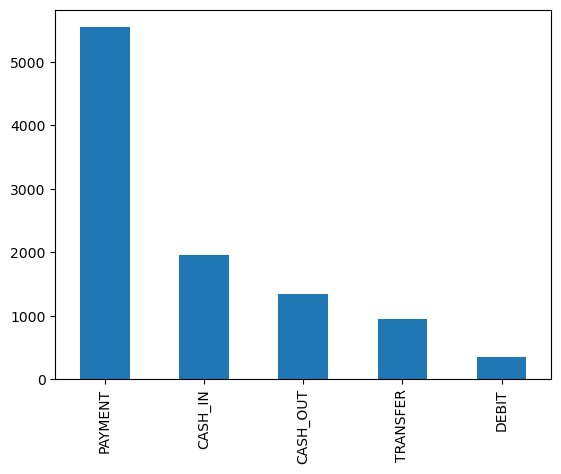

In [20]:
#To check the data for each type of transaction
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

In [21]:
#Checking the level of legitimate and fraudulent transactions
fraud_df = df[df['isFraud'] == 1]
non_fraud_df = df[df['isFraud'] == 0]

print("Fraud transactions: ", len(fraud_df)) 
print("Non-fraud transactions: ", len(non_fraud_df))

Fraud transactions:  68
Non-fraud transactions:  10059


In [22]:
#The Percentage of non-fradulent transactions is

NonFraud = (9991/10059)*100

print ('The Percentage of legitimate transaction is:', NonFraud)

#The Percentage of fradulent transactions is

Fraud= (68/10059)*100

print ('The Percentage is fraudulent:', Fraud)

The Percentage of legitimate transaction is: 99.32398846803856
The Percentage is fraudulent: 0.6760115319614276


In [23]:
#Calculation of Class Imbalance 
fraud_count = df[df['isFraud'] == 1].shape[0]
non_fraud_count = df[df['isFraud'] == 0].shape[0]

print("Number of fraud cases: ", fraud_count)
print("Number of non-fraud cases: ", non_fraud_count)
print("Imbalance ratio: ", round(non_fraud_count/fraud_count,3))

Number of fraud cases:  68
Number of non-fraud cases:  10059
Imbalance ratio:  147.926


In [25]:
#we have all 0s & 1s in our Target Feature and its a binary classification problem
df['isFraud'].unique()

array([0, 1], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


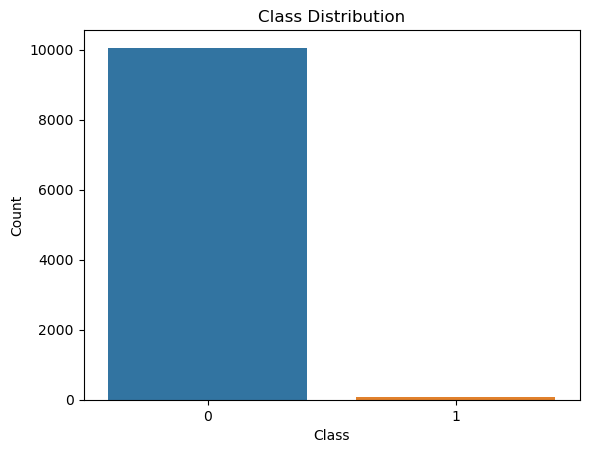

In [24]:
#To Visualize the class distribution
sns.countplot(df['isFraud'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Transaction types categorised as Fraud: ['TRANSFER', 'CASH_OUT']


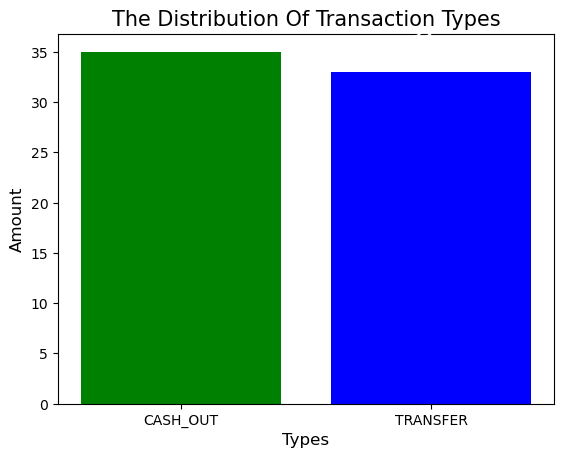

In [26]:
#To see with type has occurence of fraud

Types = round(df.loc[(df['isFraud']==1),'type'].value_counts(),2)
print(f"Transaction types categorised as Fraud: {[i for i in  df[df['isFraud']==1]['type'].unique()]}")

plt.bar(x=Types.index, height=Types.values, color=['green','blue'])
for i, v in enumerate(Types.values):   
    plt.text(i-0.08,v+3,f'{v}',fontweight='bold',color='white',fontsize=12)
plt.xlabel('Types',fontdict={'fontsize': 12})
plt.ylabel('Amount',fontdict={'fontsize': 12}) 
plt.title('The Distribution Of Transaction Types', fontdict={'fontsize': 15})
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


#Dropping of the specified columns
columns_to_drop = [
    "Acct type",
    "type",
    "branch",
    "nameOrig",
    "nameDest",
    "Date of transaction",
    "Time of day"
]
df1 = df.drop(columns=columns_to_drop)

#Split into features (X) and the target variable (y)
X = df1.drop(columns=['isFraud'])
y = df1['isFraud']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Handling the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Check the class distribution after resampling
class_distribution = y_train_resampled.value_counts()
print("Class Distribution after SMOTE:")
print(class_distribution)

Class Distribution after SMOTE:
0    8050
1    8050
Name: isFraud, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


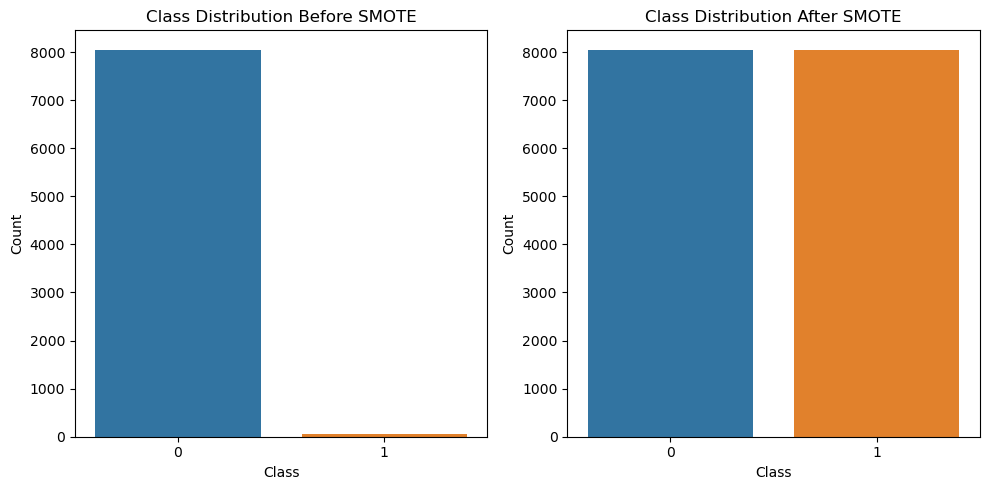

In [28]:
# Plot class distribution before and after SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
sns.countplot(y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Precision: 0.0963855421686747
Recall: 0.9411764705882353
F1 Score: 0.17486338797814208
Accuracy: 0.9254689042448174
ROC AUC: 0.9332562293209966
Confusion matrix:
 [[1859  150]
 [   1   16]]


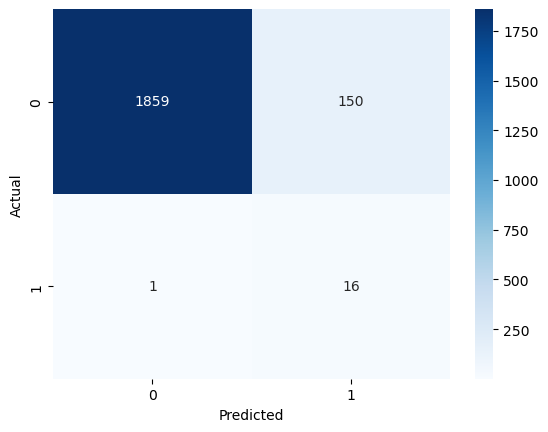

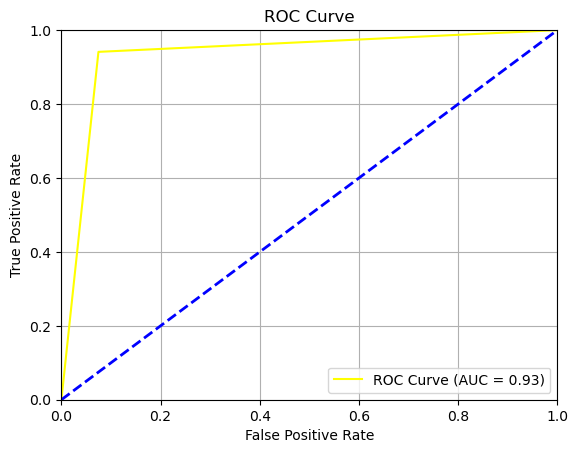

In [34]:
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, 
                             roc_auc_score, confusion_matrix, roc_curve)

#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initiating the model
lr = LogisticRegression()

#To Train model on resampled data
lr.fit(X_train_resampled, y_train_resampled)

#To Make predictions
y_pred = lr.predict(X_test)

# Model evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) 
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow', linestyle='-')
plt.plot([0, 1], [0, 1], 'b--', linewidth=2)

#Legend
plt.legend(loc='lower right',labels=['ROC Curve (AUC = %0.2f)' % roc_auc])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Precision:  0.7692307692307693
Recall:  0.5882352941176471
F1 Score:  0.6666666666666667
Accuracy:  0.9950641658440277
ROC AUC:  0.7933710069393611
Confusion Matrix: 
 [[2006    3]
 [   7   10]]


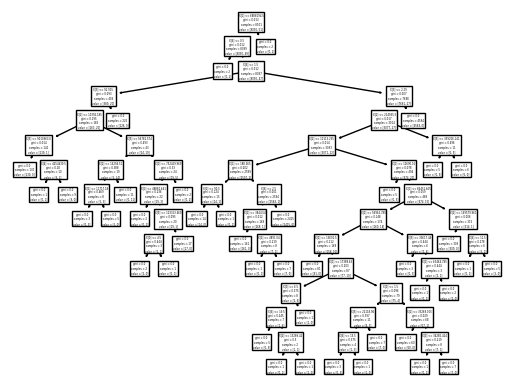

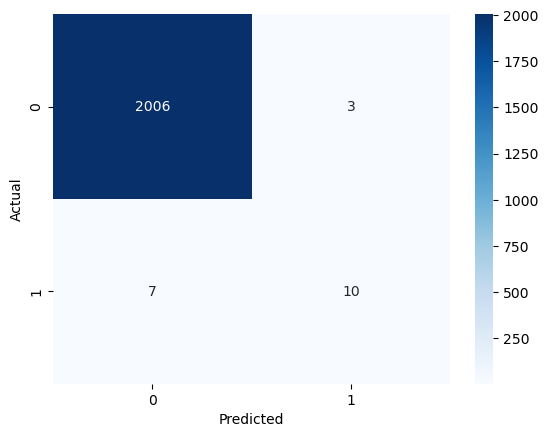

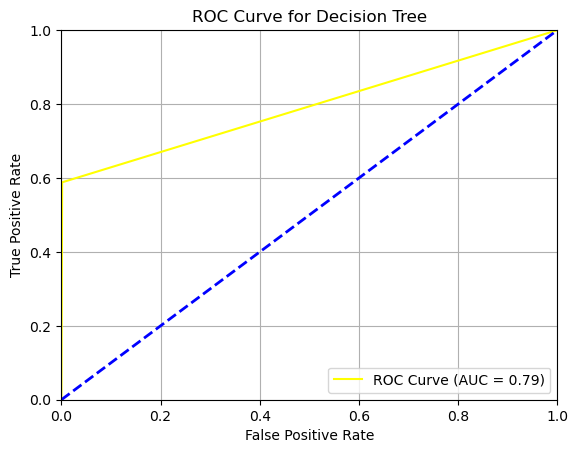

In [36]:
#Importing Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#Initialising the model
dt = DecisionTreeClassifier()

#To Train model
dt.fit(X_train, y_train) 

#Make Predictions
y_pred = dt.predict(X_test)

# Evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)  
print("ROC AUC: ", roc_auc)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

# Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree plot
from sklearn import tree
tree.plot_tree(dt)
plt.show()

# Confusion matrix heatmap
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual") 
plt.show()

# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'b--', linewidth=2, label='Chance Line') 
plt.legend(loc='lower right',labels=['ROC Curve (AUC = %0.2f)' % roc_auc])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()

Precision:  1.0
Recall:  0.4117647058823529
F1 Score:  0.5833333333333334
Accuracy:  0.9950641658440277
ROC AUC:  0.7058823529411764
Confusion Matrix: 
 [[2009    0]
 [  10    7]]


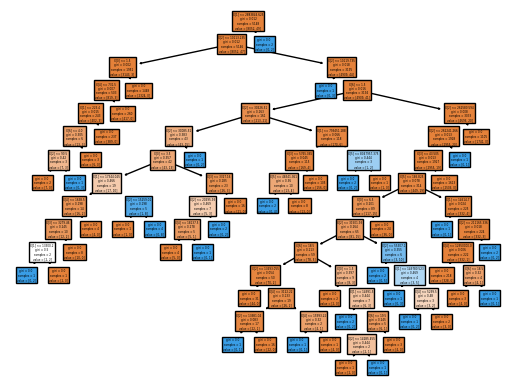

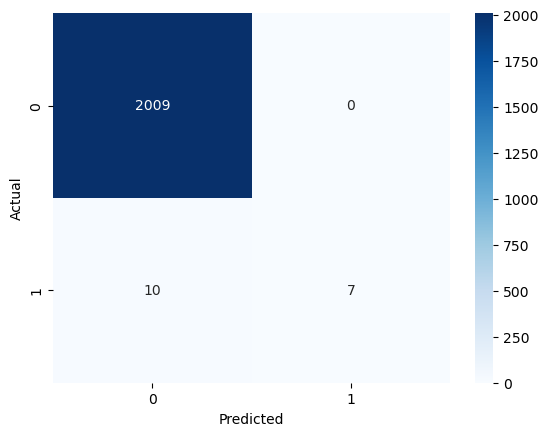

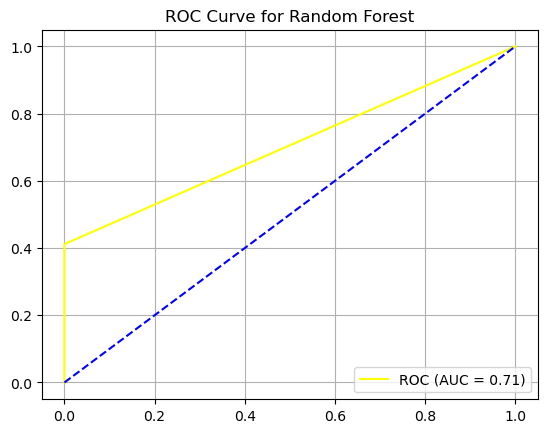

In [45]:
# Import and train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(X_train, y_train)

# Predictions and evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
y_pred = rf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 

print("Precision: ", precision)
print("Recall: ", recall) 
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

# Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Random Forest tree  
plot_tree(rf.estimators_[0], filled=True)
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual") 
plt.show()

# Customized yellow ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow', label='ROC Curve') 
plt.plot([0, 1], [0, 1], 'b--', label='Chance Line')
plt.legend(loc='lower right', labels=['ROC (AUC = %0.2f)' % roc_auc])
plt.grid()
plt.title('ROC Curve for Random Forest') 
plt.show()

Precision: 0.61
Recall: 0.65
F1 Score: 0.63
Accuracy: 0.99
ROC AUC: 0.82
Confusion Matrix: 
 [[2002    7]
 [   6   11]]


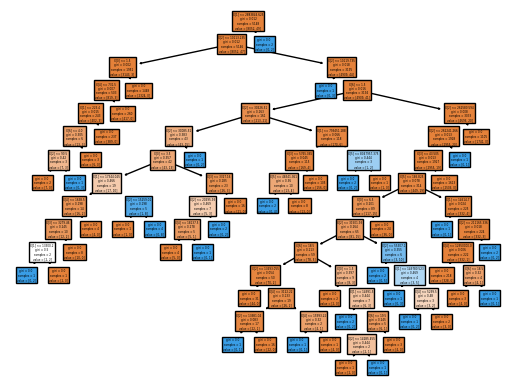

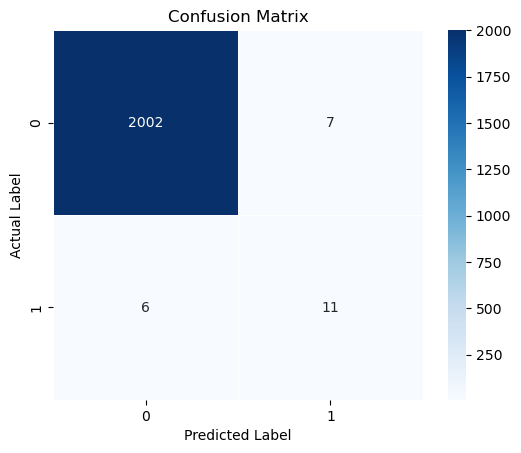

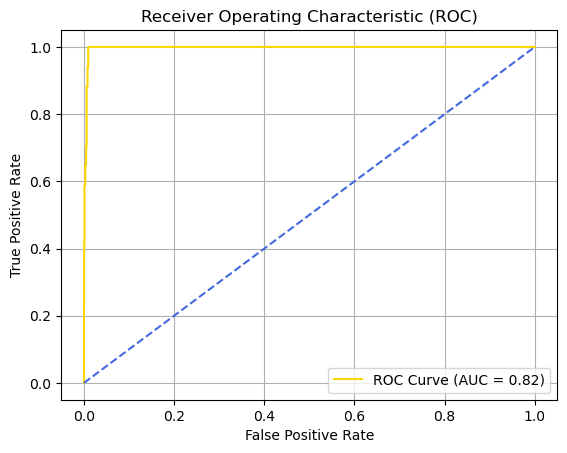

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Intialising the model
rfc = RandomForestClassifier(random_state=42)

#Fitting the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = rfc.predict(X_test)

#Calculating the evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

#Printing the evaluation metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))
print("Accuracy: {:.2f}".format(accuracy))
print("ROC AUC: {:.2f}".format(roc_auc))

#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

#Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

#To show the Random Forest tree  
plot_tree(rf.estimators_[0], filled=True)
plt.show()

#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

#Plotting the ROC AUC curve

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])

#The yellow line
plt.plot(fpr, tpr, color='gold', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))

#The blue dotted lines
plt.plot([0, 1], [0, 1], color='royalblue', linestyle='--')

#The position of the legend
plt.legend(loc='lower right')

#Setting the axis labels and title
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

#To show the plot
plt.show()


Precision: 0.01452991452991453
Recall: 1.0
F1 Score: 0.028643639427127214
Accuracy: 0.430898321816387
ROC AUC: 0.7130413140866103
Confusion matrix:
[[ 856 1153]
 [   0   17]]


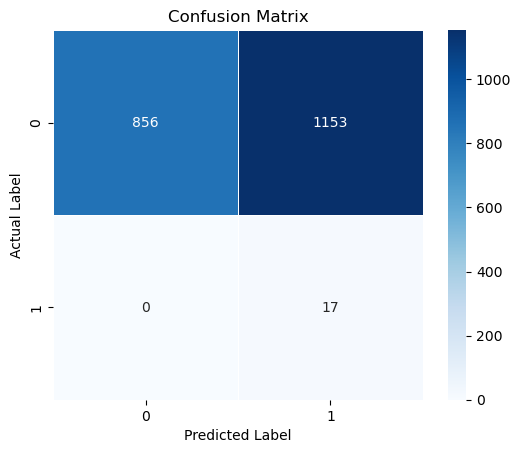

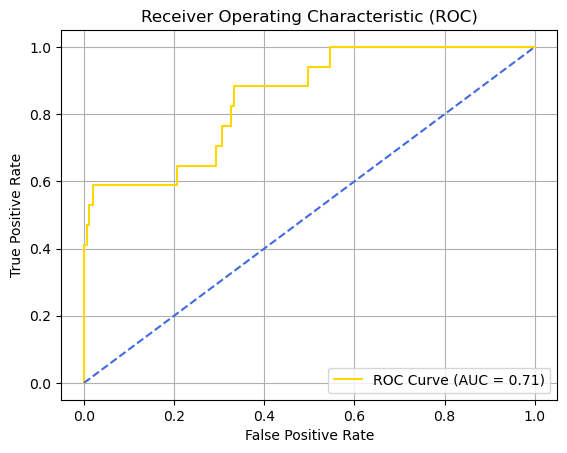

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Initiating an SVM classifier with probability estimation enabled
svc = SVC(probability=True, random_state=42)

#to Fit the model to the training data
svc.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = svc.predict(X_test)

#To Calculate the evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

#To Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:",accuracy)
print("ROC AUC:",roc_auc)

#To calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Printing the confusion matrix 
print("Confusion matrix:")
print(cm)

#To Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

#Plotting the ROCAUC

fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])

#The yellow line
plt.plot(fpr, tpr, color='gold', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))

#The blue dotted lines
plt.plot([0, 1], [0, 1], color='royalblue', linestyle='--')

#Position of the legend
plt.legend(loc='lower right')

#Axis set and title
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

#To Show the plot
plt.show()

Precision: 0.125
Recall: 0.7647058823529411
F1 Score: 0.21487603305785125
Accuracy: 0.9531095755182626
ROC AUC: 0.8803765408602464
Confusion matrix:
[[1918   91]
 [   4   13]]


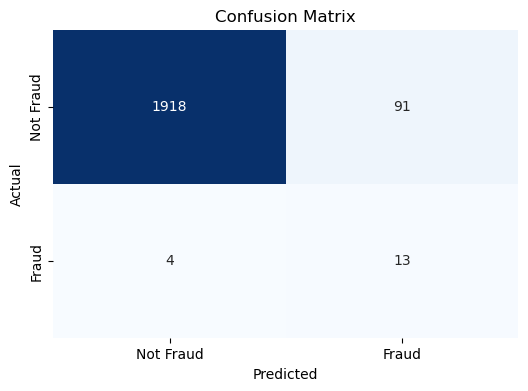

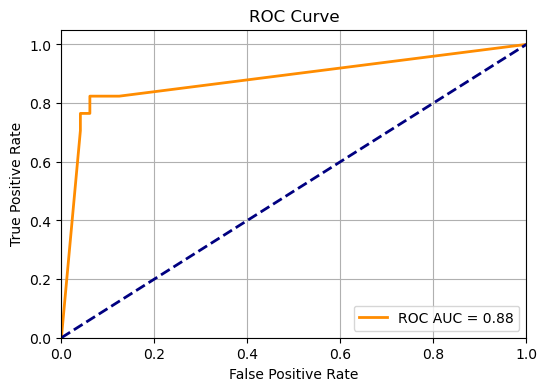

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#Train a Neural Network model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = model.predict(X_test)

#Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

#Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:",accuracy)
print("ROC AUC:",roc_auc)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix and ROC AUC metric
print("Confusion matrix:")
print(conf_matrix)

#Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

#Visualize the ROC AUC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Precision:  0.7272727272727273
Recall:  0.9411764705882353
F1 Score:  0.5833333333333334
Accuracy:  0.9965449160908193
ROC AUC:  0.9690949550551927
Confusion matrix:
[[2003    6]
 [   1   16]]


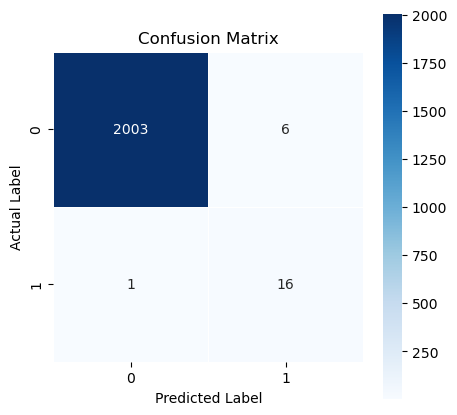

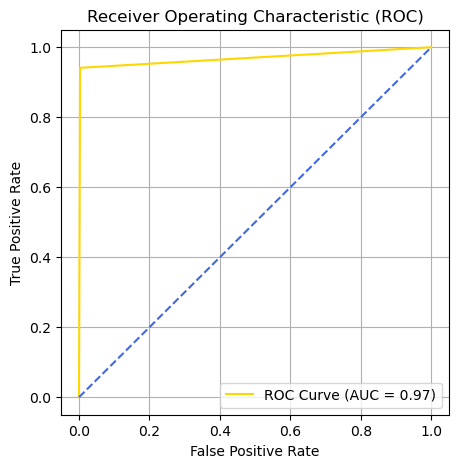

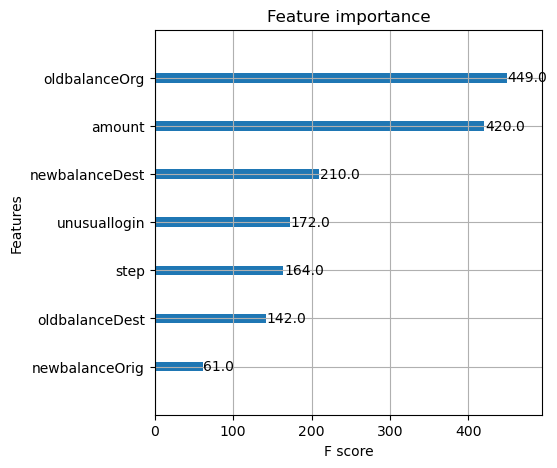

In [68]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Initialising a gradient boosting classifier
clf = xgb.XGBClassifier(random_state=42)

#Fit the model to the training data
clf.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = clf.predict(X_test)

#Calculate the evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall) 
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)  

# Print the confusion matrix and ROC AUC metric
print("Confusion matrix:")
print(cm)

#Confusion matrix
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

#ROCAUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#The Yellow line
plt.plot(fpr, tpr, color='gold', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))

#the blue dotted lines 
plt.plot([0, 1], [0, 1], color='royalblue', linestyle='--')

#Position of the legend
plt.legend(loc='lower right')

#Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Receiver Operating Characteristic (ROC)')

#Show the plot
plt.show()

#To see the gradient boosting model

from xgboost import plot_importance

plot_importance(clf)
plt.show()


Precision:  0.3404255319148936
Recall:  0.9411764705882353
F1 Score:  0.5
Accuracy:  0.9842053307008884
ROC AUC:  0.9957543993207039
Confusion matrix:
[[1978   31]
 [   1   16]]


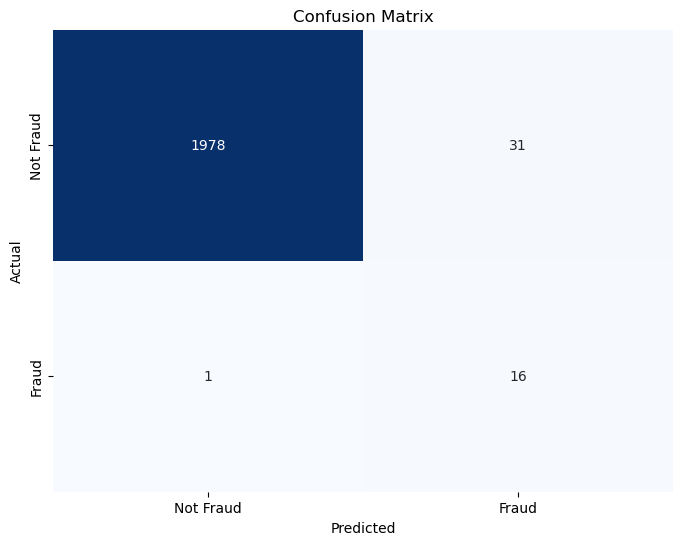

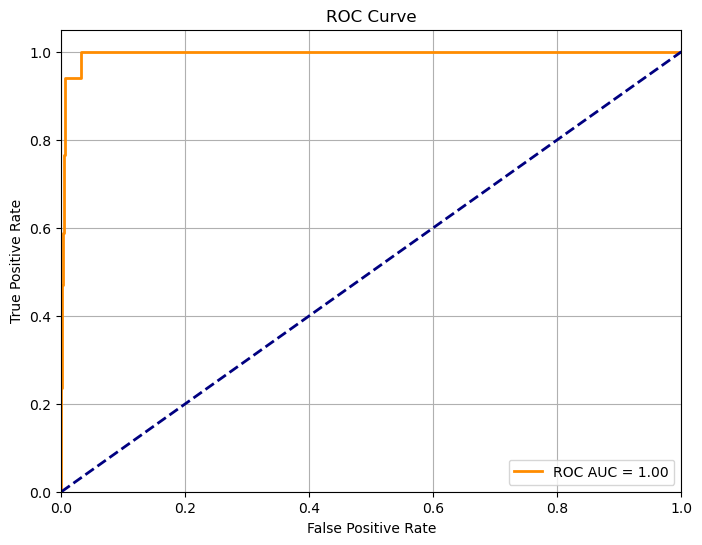

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Precision: ", precision)
print("Recall: ", recall) 
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)  

# Print the confusion matrix and ROC AUC metric
print("Confusion matrix:")
print(conf_matrix)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualize the ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



Fitting 3 folds for each of 27 candidates, totalling 81 fits
Precision:  0.7142857142857143
Recall:  0.8823529411764706
F1 Score:  0.7894736842105262
Accuracy:  0.9960513326752222
ROC AUC:  0.9987702398032383
Confusion matrix:
[[2003    6]
 [   2   15]]


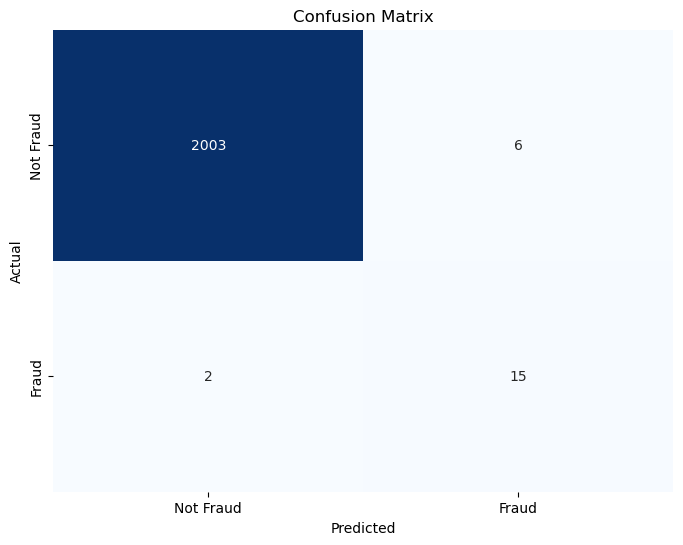

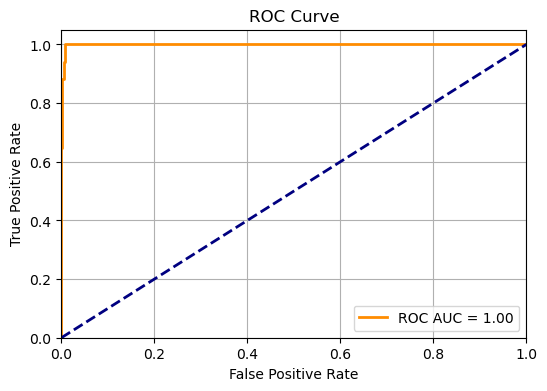

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#Definig the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

#Create a Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

#Creating a Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

#Fitting the Grid Search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Train a Gradient Boosting model with the best hyperparameters
best_model = GradientBoostingClassifier(random_state=42, **best_params)
best_model.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = best_model.predict(X_test)

#Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Precision: ", precision)
print("Recall: ", recall) 
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("ROC AUC: ", roc_auc)  

#Print the confusion matrix and ROC AUC metric
print("Confusion matrix:")
print(conf_matrix)

#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

#Visualize the ROC AUC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


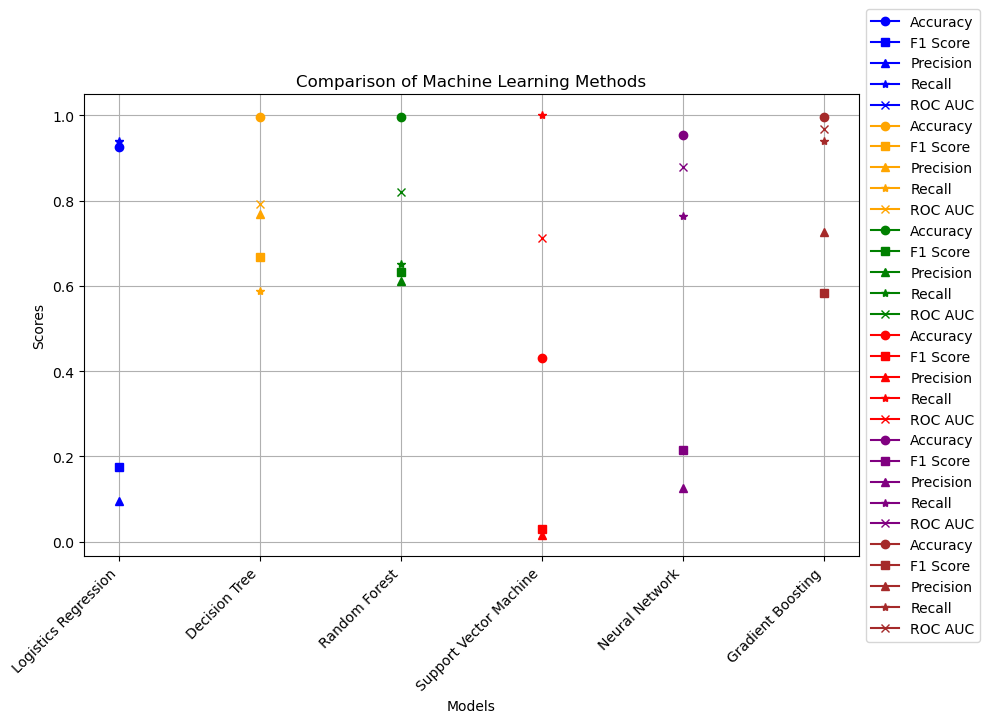

In [1]:
import matplotlib.pyplot as plt

#Putting together the metrics calculated
models = ['Logistics Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Neural Network','Gradient Boosting']
accuracy = [0.925, 0.995, 0.996, 0.431, 0.953, 0.996]
f1_score = [0.175, 0.667, 0.633, 0.029, 0.215, 0.583]
precision = [0.096, 0.769, 0.612, 0.015, 0.125, 0.727]
recall = [0.941, 0.588, 0.652, 1 , 0.765, 0.941]
roc_auc = [0.933, 0.793, 0.821, 0.713, 0.880, 0.969]

# Allocating line colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

#Setting up the line plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(models[i], accuracy[i], color=colors[i], marker='o', label='Accuracy')
    plt.plot(models[i], f1_score[i], color=colors[i], marker='s', label='F1 Score')
    plt.plot(models[i], precision[i], color=colors[i], marker='^', label='Precision')
    plt.plot(models[i], recall[i], color=colors[i], marker='*', label='Recall')
    plt.plot(models[i], roc_auc[i], color=colors[i], marker='x', label='ROC AUC')

#Setting plot title and axis labels
plt.title('Comparison of Machine Learning Methods')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.grid()
# Rotating x-axis labels to an angle
plt.xticks(rotation=45, ha='right')

# Placing the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Visualizing the plot
plt.show()
